In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [77]:
con=sqlite3.connect(r"C:\Users\Charu Singh\Downloads\database.sqlite")

In [78]:
df=pd.read_sql_query('SELECT * FROM Reviews',con)

In [79]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Sentiment analysis

In [80]:
!pip install TextBlob

In [81]:
from textblob import TextBlob

In [82]:
text=df['Summary'][0]
text

'Good Quality Dog Food'

In [83]:
TextBlob(text).sentiment.polarity

0.7

In [84]:
polarity=[]
for i in df['Summary']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [85]:
data=df.copy()
data['Polarity']=polarity
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.7
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.8


In [86]:
data_positive=data[data['Polarity']>0]

In [87]:
data_positive.shape

(331665, 11)

In [88]:
!pip install wordcloud

In [89]:
from wordcloud import WordCloud,STOPWORDS

In [90]:
stopwords=set(STOPWORDS)
data_positive.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.700000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.800000
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,0.600000
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,0.358333
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,1.000000


In [91]:
total_text=('  '.join(data_positive['Summary']))

In [92]:
len(total_text)

8796676

In [93]:
total_text[0:10000]

'Good Quality Dog Food  Great taffy  Nice Taffy  Great!  Just as good as the expensive brands!  Wonderful, tasty taffy  Healthy Dog Food  The Best Hot Sauce in the World  My cats LOVE this "diet" food better than their regular food  My Cats Are Not Fans of the New Food  fresh and greasy!  Love it!  GREAT SWEET CANDY!  Always fresh  Delicious product!  Great Bargain for the Price  The Best Hot Sauce in the World  Great machine!  Best of the Instant Oatmeals  Good Instant  Great Irish oatmeal for those in a hurry!  satisfying  Love Gluten Free Oatmeal!!!  GOOD WAY TO START THE DAY....  Wife\'s favorite Breakfast  Why wouldn\'t you buy oatmeal from Mcanns? Tastes great!  Good Hot Breakfast  Great taste and convenience  good  Very good but next time I won\'t order the Variety Pack  HOT!  And good!  Came back for more  :)  Roasts up a smooth brew  Our guests love it!  Awesome Deal!  Awsome - Kids in neighborhood loved us!  great deal.  Better price for this at Target  great source of electr

In [94]:
import re
total_text=re.sub('[^a-zA-Z]',' ',total_text)

In [95]:
total_text[0:2000]

'Good Quality Dog Food  Great taffy  Nice Taffy  Great   Just as good as the expensive brands   Wonderful  tasty taffy  Healthy Dog Food  The Best Hot Sauce in the World  My cats LOVE this  diet  food better than their regular food  My Cats Are Not Fans of the New Food  fresh and greasy   Love it   GREAT SWEET CANDY   Always fresh  Delicious product   Great Bargain for the Price  The Best Hot Sauce in the World  Great machine   Best of the Instant Oatmeals  Good Instant  Great Irish oatmeal for those in a hurry   satisfying  Love Gluten Free Oatmeal     GOOD WAY TO START THE DAY      Wife s favorite Breakfast  Why wouldn t you buy oatmeal from Mcanns  Tastes great   Good Hot Breakfast  Great taste and convenience  good  Very good but next time I won t order the Variety Pack  HOT   And good   Came back for more      Roasts up a smooth brew  Our guests love it   Awesome Deal   Awsome   Kids in neighborhood loved us   great deal   Better price for this at Target  great source of electroly

In [96]:
total_text=re.sub('  +',' ',total_text)

In [97]:
total_text[0:1000]

'Good Quality Dog Food Great taffy Nice Taffy Great Just as good as the expensive brands Wonderful tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this diet food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy Love it GREAT SWEET CANDY Always fresh Delicious product Great Bargain for the Price The Best Hot Sauce in the World Great machine Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry satisfying Love Gluten Free Oatmeal GOOD WAY TO START THE DAY Wife s favorite Breakfast Why wouldn t you buy oatmeal from Mcanns Tastes great Good Hot Breakfast Great taste and convenience good Very good but next time I won t order the Variety Pack HOT And good Came back for more Roasts up a smooth brew Our guests love it Awesome Deal Awsome Kids in neighborhood loved us great deal Better price for this at Target great source of electrolytes Great for preventing cramps Taste is not so good How much would you

(-0.5, 999.5, 499.5, -0.5)

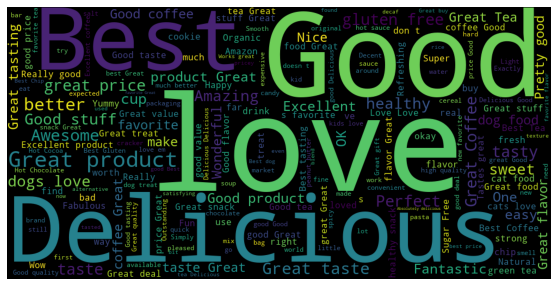

In [98]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [99]:
data_negative=data[data['Polarity']<0]

In [100]:
total_text2=('  '.join(data_negative['Summary']))

In [101]:
total_text2=re.sub('[^a-zA-Z]',' ',total_text2)

In [102]:
total_text2=re.sub('  +',' ',total_text2)

In [103]:
total_text2

'poor taste Nasty No flavor How can you go wrong pretty expensive stale product Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS Tasteless but low calorie Marley s Mellow Mood Lite Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee Fantastic Chicken Noodle soup Heinz no more Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but a little hard 

(-0.5, 999.5, 499.5, -0.5)

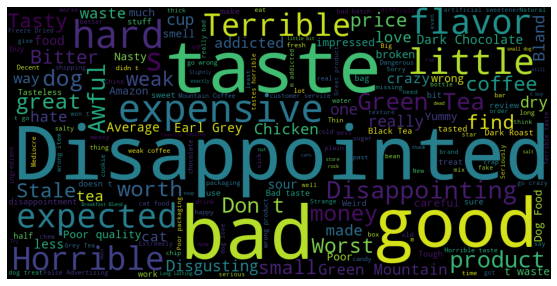

In [104]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_text2)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# How amazon recommend products?

In [105]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [106]:
df['UserId'].nunique()

256059

In [107]:
raw=df.groupby('UserId').agg({'Summary':'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='Text',ascending = False)

In [108]:
raw

,Summary,Text,Score,ProductId
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HROKQO0GA5AF,1,1,3.000000,1
A2HROR28DMJV2W,1,1,5.000000,1
A2HRR8CO2Y20G8,1,1,5.000000,1


In [109]:
raw.columns=['Number_of_summaries','Num_text','Avg_score','No_of_products_purchased']

In [110]:
raw

,Number_of_summaries,Num_text,Avg_score,No_of_products_purchased
UserId,,,,
A3OXHLG6DIBRW8,448,448,4.535714,448
A1YUL9PCJR3JTY,421,421,4.494062,421
AY12DBB0U420B,389,389,4.647815,389
A281NPSIMI1C2R,365,365,4.841096,365
A1Z54EM24Y40LL,256,256,4.453125,256
...,...,...,...,...
A2HROKQO0GA5AF,1,1,3.000000,1
A2HROR28DMJV2W,1,1,5.000000,1
A2HRR8CO2Y20G8,1,1,5.000000,1


In [111]:
user_10=raw.index[0:10]

In [112]:
number_10=raw['No_of_products_purchased'][0:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

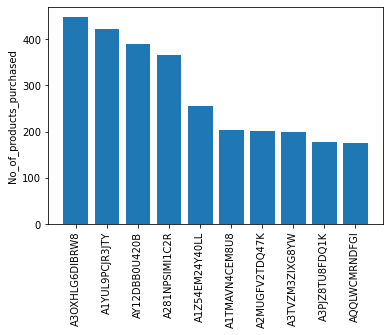

In [113]:
plt.bar(user_10,number_10,label='Most recommended users')
plt.xlabel=('UserId')
plt.ylabel('No_of_products_purchased')
plt.xticks(rotation='vertical')

In [114]:
df.sample(n=2000)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
545825,545826,B0026LFFN8,A344M4952B9D8Y,Lori Fleming,5,5,5,1264809600,Love IAMS!!,With 5 cats I need to buy cat food in bulk!! ...
94175,94176,B0018CE6DQ,AQ8KS8TEQJIGQ,Julie F. Roohi,1,2,1,1342915200,I wouldn't buy any dog food made by Diamond (c...,Let me preface this by saying I LOVE AMAZON. T...
172317,172318,B001B3JAL0,A108UDGI88LWWK,Tom D. Skulan,1,1,4,1328313600,Good but NOT low in calories!,I was looking for a new kind of snack and saw ...
421626,421627,B002VLZ8D0,AI4YSOGQGYCLH,"Anne M. Thomas ""A. Thomas""",25,25,5,1323907200,SUPER HEALING!,I purchased this product to try and remedy my ...
274901,274902,B00141OY4W,A8LEO0WP3PZ6D,"Sherry Z. ""Love is the answer""",1,1,5,1285200000,Made in China but A GREAT PRODUCT!!!,I have done so much research on foods/treats f...
...,...,...,...,...,...,...,...,...,...,...
80724,80725,B003YZ4LN0,A2FSN64HXHKXAP,@classicurge,1,2,1,1327536000,Incorrect description,"As of today January 26th 2012, the description..."
167251,167252,B000OLIXO0,A1Z6TK0L1M5CWB,rlroberts,1,1,4,1281916800,Quick and easy to use,This product was easy to use and blend. I adde...
54998,54999,B000IHJEDE,A2AUDU9Q784RVB,"robb quick ""mia""",2,2,3,1308528000,Pleasant,"Like many on the Atkins diet, I needed somethi..."
537027,537028,B0012KH0F0,A1K1G4Y1HJREAI,Coramov,1,1,5,1337126400,Excelente para los gatos,"Esta golosina gusta mucho a los gatos, en espe..."


In [115]:
final=df[0:2000]

In [116]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [117]:
final.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [118]:
final.duplicated().sum()

0

In [119]:
def calc_len(text):
    return len(text.split(' '))

In [120]:
final['Text_length']=final['Text'].apply(calc_len)

<ipython-input-120-a7a52d29ef9c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
import plotly.express as px

In [122]:
px.box(final,y='Text_length')

C:\Users\Charu Singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Score', ylabel='count'>

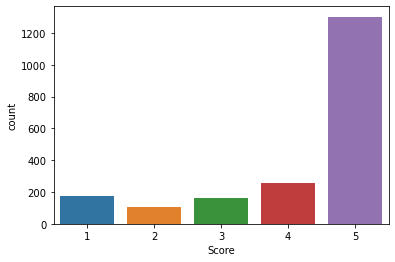

In [123]:
sns.countplot(final['Score'])